<a href="https://www.kaggle.com/code/sarahhudaib/chess-board?scriptVersionId=92068680" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lab: Numpy Arrays Building a chess board
## Overview
Today we’ll be constructing chess boards like it’s 1980.


## Feature Tasks and Requirements
Your job is to render out chess boards with red and blue queens on them.
We’re keeping it really basic here so the only pieces are queens and each queen is represented by a blue or red square.
Chess board is an 8 by 8 grid of alternating black and white squares. The queens are red and blue squares.
Each board will have one red and one blue queen at different coordinates. In addition to displaying the board you’ll need to identify if the queens are “under attack” based on their coordinates.


### Implementation Notes
- [x] Define a `ChessBoard class`
- [x] should have `add_red method` that accepts a row and column as input which colors corresponding cell.
- [x] should have `add_blue method` that accepts a row and column as input which colors corresponding cell.
- [x] should have `render method` that displays the chess board on screen with red and blue shown in correct locations
- [x] should have `is_under_attack method` that return boolean if red is under attack by a blue piece horizontally, vertically or diagonally

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RGB_format_color = {
    'black': [0.,0.,0.],
    'white': [1.,1.,1.],
    'blue': [0.,1.,1.],
    'red': [1.,0.2,0.]
}

class ChessBoard:
    def __init__(self):
        self.grid = self.grid(8,8)
        self.red_queen = {}
        self.blue_queen = {}
        # list indices must be integers or slices, not str
    
    # https://stackoverflow.com/questions/23380770/implementing-check-in-a-chess-game
    """
    enumerate(iterable, start=0)

Parameters:
Iterable: any object that supports iteration
Start: the index value from which the counter is 
              to be started, by default it is 0
    """
    def grid(self, rows, columns):
        board = np.zeros((rows,columns,3))
#         grid=np.ones((8,8,3))
        for row_index, row in enumerate(board):
            
            if row_index % 2 == 0:
                for col_index, column in enumerate(row):
                    if col_index % 2:
                        row[col_index] = RGB_format_color['white']
                        
            else:
                for col_index, column in enumerate(row):
                    if not col_index % 2:
                        row[col_index] = RGB_format_color['white']
                        
        return board
    
    
    def add_red(self, row, column):
        self.grid[row,column] = RGB_format_color['red']
        self.red_queen['red_queen'] = [row, column]
    
    
    def add_blue(self, row, column):
        self.grid[row,column] = RGB_format_color['blue']
        self.blue_queen['blue_queen'] = [row, column]
    
    def render(self):
        plt.imshow(self.grid)
        
    
    def is_under_attack(self):
        blue_queen_y, blue_queen_x = self.blue_queen['blue_queen']
        red_queen_y, red_queen_x = self.red_queen['red_queen']
        
        #https://stackoverflow.com/questions/65465295/how-to-guess-the-positions-of-the-queens-in-a-chess-game
        if red_queen_y == blue_queen_y:
            return True
        
        elif red_queen_x == blue_queen_x:
            return True
        
        # https://stackoverflow.com/questions/19524155/how-do-you-test-for-diagonal-in-n-queens
        elif abs((red_queen_y-blue_queen_y)/(red_queen_x-blue_queen_x)) == 1:
            return True
       
        else:
            return False
        


### User Acceptance Tests

- [x] Horizontal (aka same row)
- [x] Vertical (aka same column).
- [x] Four Diagonals.
- [x] A “Not Under Attack” scenario.


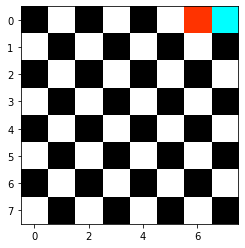

In [2]:
# Horizontal (aka same row)

start_game = ChessBoard()
start_game.add_red(0,6)
start_game.add_blue(0,7)
start_game.render()
actual= start_game.is_under_attack()

expected = True
assert actual == expected

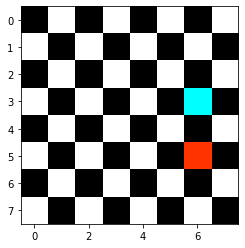

In [3]:
# Vertical (aka same column).

start_game = ChessBoard()
start_game.add_red(5,6)
start_game.add_blue(3,6)
start_game.render()
actual= start_game.is_under_attack()

expected = True
assert actual == expected

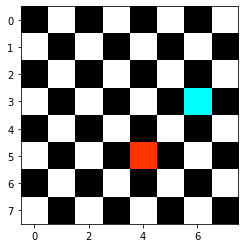

In [4]:
# Four Diagonals.

start_game = ChessBoard()
start_game.add_red(5,4)
start_game.add_blue(3,6)
start_game.render()
actual= start_game.is_under_attack()

expected = True
assert actual == expected

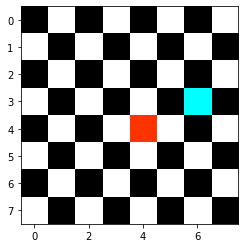

In [5]:
# A “Not Under Attack” scenario.

start_game = ChessBoard()
start_game.add_red(4,4)
start_game.add_blue(3,6)
start_game.render()
actual= start_game.is_under_attack()

expected = False
assert actual == expected